In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [ ]:
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
CLASSES = 10  # number of outputs = number of digits

In [ ]:
def build(input_shape, classes):
    model = models.Sequential()
    #1.CONV => POOL
    model.add(layers.Convolution2D(filters = 6, kernel_size = 5, activation='tanh',
                                   padding='same', input_shape=input_shape))
        # 첫 번째 컨볼루션 층을 모델에 추가. 5x5 크기의 필터 6개 사용, tanh 활성화 함수 적용
        # padding='same' 입력 이미지의 크기 유지를 위해 패딩 적용
        # input_shape는 모델에 입력될 이미지의 차원 지정 INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
        # AveragePooling 층 추가 2x2 크기 필터 적용

    #2. CONV =>  POOL
    model.add(layers.Convolution2D(16, kernel_size = 5, activation='tanh'))
        # 두 번째 컨볼루션 층 추가  5x5 필터 16개 사용, tanh 활성화 함수를 적용
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))

    # 3. CONV
    model.add(layers.Convolution2D(120, kernel_size = 5, activation='tanh'))
        # 세 번째 컨볼루션 층 추가. 5x5 필터 120개.

    # Flatten
    model.add(layers.Flatten())
      # 2D 피처 맵을 1D 벡터로 변환 -> Dense layer로 전달

    # Dense Layer
    model.add(layers.Dense(84, activation='tanh')) # 84개의 Node, tanh 활성화 함수

    # a softmax classifier
    model.add(layers.Dense(classes, activation="softmax"))
    return model

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
# reshape
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [ ]:
# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
# cast
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, CLASSES)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
# initialize the optimizer and model
model = build(input_shape=INPUT_SHAPE, classes=CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

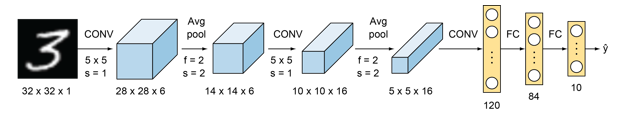

In [ ]:
# fit
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 29s 69ms/step - loss: 0.0606 - accuracy: 0.9815 - val_loss: 0.0561 - val_accuracy: 0.9840
Epoch 2/5
422/422 [==============================] - 27s 64ms/step - loss: 0.0471 - accuracy: 0.9858 - val_loss: 0.0556 - val_accuracy: 0.9852
Epoch 3/5
422/422 [==============================] - 27s 65ms/step - loss: 0.0387 - accuracy: 0.9879 - val_loss: 0.0498 - val_accuracy: 0.9872
Epoch 4/5
422/422 [==============================] - 28s 66ms/step - loss: 0.0315 - accuracy: 0.9904 - val_loss: 0.0504 - val_accuracy: 0.9867
Epoch 5/5
422/422 [==============================] - 31s 73ms/step - loss: 0.0257 - accuracy: 0.9921 - val_loss: 0.0514 - val_accuracy: 0.9870


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])


313/313 [==============================] - 3s 8ms/step - loss: 0.0455 - accuracy: 0.9844

Test loss: 0.045548636466264725
Test accuracy: 0.9843999743461609


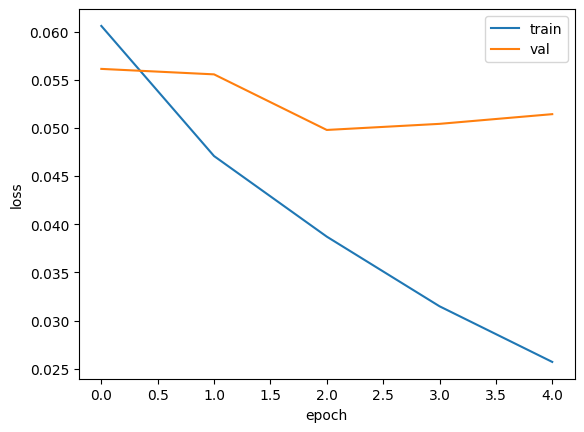

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

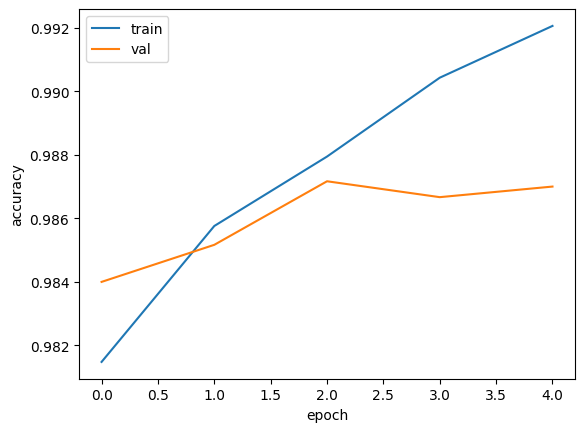

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np

# 모델 불러오기
model = VGG16(weights='imagenet', include_top=True)



553467096/553467096 [==============================] - 8s 0us/step


In [ ]:
# 이미지 불러오기 및 크기 조정
img_path = '/content/dog.12.6.jpeg'
img = image.load_img(img_path, target_size=(224, 224))

# 이미지를 배열로 변환
x = image.img_to_array(img)

# 배치 차원 추가
x = np.expand_dims(x, axis=0)

# 이미지 전처리
x = preprocess_input(x)

# 이미지 분류 예측
predictions = model.predict(x)

# 예측 결과 해석
print('Predicted:', decode_predictions(predictions, top=3)[0])

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n02096294', 'Australian_terrier', 0.90590805), ('n02093991', 'Irish_terrier', 0.08211212), ('n02094258', 'Norwich_terrier', 0.0021963613)]
